# Лабораторная работа №5
## Партин Максим
## А-13а-20
### Вариант № 32

## Задание 5.1


Вычислить значение интеграла $$\int\limits_1^3 P_m(x)\,dx$$

где $$ P_m(x) = \sum\limits_{i=0}^m{c_i x^i} $$

с помощью элементарных  квадратурных  формул  левых прямоугольников и по формуле индивидуального варианта.  Затем, используя априорную оценку погрешности, оценить шаг интегрирования h, требуемый для достижения  точности  $\varepsilon = 0.0001$. Вычислить интеграл с найденным шагом интегрирования.

Значения коээфициентов $ c_i $ в моем варианте

$ c_0 $ | $ c_1 $ | $ c_2 $ | $ c_3 $ | $ c_4 $ | $ c_5 $
--- | --- | --- | --- | --- | ---
$ 2.2 $ | $ -4.1 $ | $0.3$ | $-3.4$ | $0$ | $0$



Зададим заданную функцию

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Заданная функция
c = np.array([2.2, -4.1, 0.3, -3.4, 0, 0])
def f(x: np.float64) -> np.float64:
    f = 0
    for i in range(len(c)):
        f += c[i] * np.power(x, i)
    return f

Покажем графически отрезок, на котором происходит интегрирование. Для этого построим график функции на отрезке от $[1, 3]$

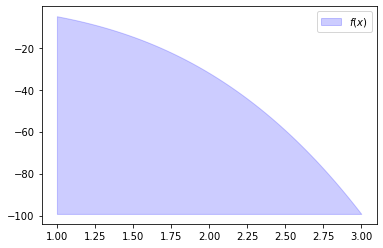

In [19]:
a = 1
b = 3
x = np.linspace(a, b, 10000)
y = np.array(list(map(f, x)))
plt.fill_between(x, y, np.min(y),
                color = 'blue',
                alpha = 0.2,
                label = '$f(x)$')
plt.legend()
plt.show()

Вычислим данный интеграл, используя средства python

In [20]:
I = integrate.quad(f, a, b)
I[0]

-77.39999999999999

Получили такое теоретическое значение

## Вычисление интеграла по формуле левых прямоугольников

Теоретическая справка про метод левых прямоугольников

Формула для вычисления:

$$ J =  \int\limits_a^b f(x)\, dx \approx I_{лев} = h \cdot \sum\limits_{i = 0}^{N - 1} f_i$$

Где $ N $ - число отрезков разбиения, $f_i$ - значение функции в точке $x_i$, $h$ - шаг сетки, если сетка является равномерной, то есть шаг везде одинаковый. Вычисляется по формуле  $$ h = \frac{b - a}{N} $$

Оценка погрешности:

Если функция $f$ непрерывна и непрерывна дифференцируема на отрезке $[a, b]$, то справедлива следующая оценка погрешности

$$ \left|J - I_{лев}\right| \leq \frac{M_1 (b-a)}{2} h$$

где

$$ M_1 = \max_{[a, b]} \left|f^{\prime}(x)\right|$$,

Функция, заданная по условию удовлетворяет условию теоремы, поэтому мы можем применить оценку для погрешности и посчитать,
необходимое число отрезков разбиения. Займемся этим

Производная заданной функции равна

$$ P_m^{\prime}(x) = \sum\limits_{i = 0}^{m} c_i \cdot i x^{i - 1}$$

In [10]:
eps = 0.0001 # Заданная точность

# Производная заданной функции
def df(x : np.float64) -> np.float64:
    df = 0
    for i in range(len(c)):
        df += c[i] * i * np.power(x, i - 1)
    return df

x = np.linspace(a, b, 1000)
y = np.array(list(map(df, x)))
min_y = np.max(y)
max_y = np.min(y)
m1 = max(abs(max_y), abs(min_y)) # Максимум первой производной

In [11]:
%%time 
# Оценка погрешности метода левых прямоугольников
def errorMethodLeftRectangles(a, b, m1: np.float64, N : int) -> np.float64:
    h = (b - a) / N
    return (m1 * (b - a) * h) / 2
N = 1
# Запускаем цикл для расчета необходимого N
while errorMethodLeftRectangles(a, b, m1, N) >= eps:
    N += 1
    
h = (b - a) / N
print("Число отрезков интегрирования = ", N)
print("Шаг интегрирования = ", h)

Число отрезков интегрирования =  1882000
Шаг интегрирования =  1.0626992561105207e-06
Wall time: 1.61 s


Теперь займемся вычислением значения интеграла и найдем погрешность измерения, то есть найдем следующую разность
$$ \left|J - I_{лев}\right| $$

где $J$ - точное значение интеграла, $I_{лев}$ - значение интеграла полученное по формуле левых прямоугольников

In [12]:
%%time
# Значение интеграла, по формуле левых прямоугольник
def MethodLeftRectangles(f, h : np.float64, N : int, a : np.float64) -> np.float64:
    x_i = a
    I_left = 0
    for i in range(N):
        I_left += f(x_i)
        x_i += h
    return I_left * h

I_left = MethodLeftRectangles(f, h, N, a)
print("Значение интеграла по формуле левых прямоугольников: ", I_left)
print("Погрешность измерений с помощью формулы левых прямоугольников", np.abs(I - I_left)[0])

Значение интеграла по формуле левых прямоугольников:  -77.39994995126494
Погрешность измерений с помощью формулы левых прямоугольников 5.0048735047880655e-05
Wall time: 16 s
Parser   : 106 ms


**Вывод:** Вычисление по формуле левых прямоугольников занимает крайне много времени. На подготовку вычисления шага интегрирования и числа отрезков интегрирования ушло примерно 2 секунды, и на сами вычисления примерно 17с. В общем на 
вычисление одного интеграла ушло целых 19 секунд

## Вычисление интеграла по формуле трапеций



Формула индивидуального варианта - это формула трапеций

Теоретическая справка про формулу трапеций

Формула для вычисления:

$$ J =  \int\limits_a^b f(x)\, dx \approx I_{тр} = h \cdot \left(\frac{f_0 + f_N}{2} + \sum\limits_{i = 1}^{N - 1} f_i \right)$$

Где $J$ - точное значение интеграла, $ I_{тр} $ - приближенное значение по формуле трапеций, $ N $ - число отрезков разбиения, $f_i$ - значение функции в точке $x_i$, $h$ - шаг сетки, если сетка является равномерной, то есть шаг везде одинаковый. Вычисляется по формуле  $$ h = \frac{b - a}{N} $$

Оценка погрешности:

Если функция $f$ непрерывна и дважды непрерывна дифференцируема на отрезке $[a, b]$, то справедлива следующая оценка погрешности

$$ \left|J - I_{тр}\right| \leq \frac{M_2 (b-a)}{12} h^2$$

где

$$ M_2 = \max_{[a, b]} \left|f^{\prime\prime}(x)\right|$$,

Функция, заданная по условию удовлетворяет условию теоремы, поэтому мы можем применить оценку для погрешности и посчитать,
необходимое число отрезков разбиения. Займемся этим

Вторая производная заданной функции равна

$$ P_m^{\prime\prime}(x) = \sum\limits_{i = 0}^{m} c_i \cdot i \cdot (i - 1) \cdot x^{i - 2} $$

In [33]:
# Вторая производная заданной функций
def df2(x: np.float64) -> np.float64:
    df2 = 0
    for i in range(len(c)):
        df2 += c[i] * i * (i - 1) * np.power(x, i - 2)
    return df2

x = np.linspace(a, b, 1000)
y = np.array(list(map(df2, x)))
max_y = np.max(y)
min_y = np.min(y)
m2 = max(abs(max_y), abs(min_y)) # Максимум второй производной
#print("m2 = ", m2)
#print("m1 = ", m1)

m2 =  60.599999999999994
m1 =  94.1


In [36]:
%%time

eps = 0.0001 # Заданная точность
# Оценка погрешности метода трапеций
def errorMethodTrapezes(a, b, m2: np.float64, N : int) -> np.float64:
    h = (b - a) / N
    return m2 * (b - a) * h**2 / 12

N = 1
# Запускаем цикл для расчета необходимого N
while errorMethodTrapezes(a, b, m2, N) >= eps:
    N += 1
    
h = (b - a) / N
print("Число отрезков интегрирования = ", N)
print("Шаг интегрирования = ", h)

Число отрезков интегрирования =  636
Шаг интегрирования =  0.0031446540880503146
Wall time: 1.01 ms


In [42]:
%%time
# Значение интеграла, по формуле трапеций
def MethodTrapezes(f, h: np.float64, N: int, a, b: np.float64) -> np.float64:
    I_trapeze = (f(a) + f(b)) / 2
    x_i = a
    for i in range(1, N):
        x_i += h
        I_trapeze += f(x_i)
    return I_trapeze * h

I_trapeze = MethodTrapezes(f, h, N, a, b)
print("Значение интеграла по формуле левых прямоугольников: ", I_trapeze)
print("Погрешность измерений с помощью формулы левых прямоугольников", np.abs(I - I_trapeze)[0])
# np.abs(I - I_trapeze)[0] < eps

Значение интеграла по формуле левых прямоугольников:  -77.4000662552922
Погрешность измерений с помощью формулы левых прямоугольников 6.625529221082616e-05
Wall time: 6.96 ms


**Вывод:** Формула трапеций показала себя намного более быстрее, чем формула левых прямоугольников. Она отработала почти моментально. Это еще раз подчеркивает, что формула трапеций имеет второй порядок точности, а формула левых прямоугольников первый порядок точности

## Вычисление интеграла, используя квадратуры Гаусса

Запишем заданные многочлен в развернутом в виде 

$$ P_3(x) = 2,2 - 4,1x + 0,3x^2 - 3.4x^3 + 0 \cdot x^4 + 0 \cdot x^5 = 2,2 - 4,1x + 0,3x^2 - 3.4x^3 $$  

Согласно общей теории квадратурные формулы Гаусса точны для многочленов степени $2N + 1$ при $ N + 1 $ узлах.
То есть в нашем случае N = 2

Теперь займемся построением квадратурной формулы Гаууса с двумя узлами

$$\int\limits_{-1}^{1} f(t)\,dt = a_0 f(t_0) + a_1 f(t_1)$$

Имеем 4 неизвестные $t_0$, $t_1$, $a_0$, $a_1$, то есть следует взять 4 базисные функции $1$, $t$, $t^2$, $t^3$

Тогда получаем следующую систему уравнений

\begin{cases}
a_0 + a_1 = \int\limits_{-1}^{1} 1\, dt \\
a_0 t_0 + a_1 t_1 = \int\limits_{-1}^{1} t, dt \\
a_0 t_0^2 + a_1 t_1^2 = \int\limits_{-1}^{1} t^2, dt \\
a_0 t_0^3 + a_1 t_1^3 = \int\limits_{-1}^{1} t^3, dt \\
\end{cases}

Вычислим в заданной системе интегралы

$$ \int\limits_{-1}^{1} 1\, dt = 1 - (-1) = 2 $$

$$  \int\limits_{-1}^{1} t, dt = \frac{t^2}{2}\bigg|_{-1}^1 = \frac{1}{2} - \frac{1}{2} = 0 $$

$$  \int\limits_{-1}^{1} t^2, dt = \frac{t^3}{3}\bigg|_{-1}^1 = \frac{1}{3} + \frac{1}{3} = \frac{2}{3} $$

$$  \int\limits_{-1}^{1} t^3, dt = \frac{t^4}{4}\bigg|_{-1}^1 = \frac{1}{4} - \frac{1}{4} = 0 $$

Получим тогда следующую систему уравнений

\begin{cases}
a_0 + a_1 = 2 \\
a_0 t_0 + a_1 t_1 = 0 \\
a_0 t_0^2 + a_1 t_1^2 = \frac{2}{3} \\
a_0 t_0^3 + a_1 t_1^3 = 0 \\
\end{cases}

Решив эту систему получим следующим значения

\begin{cases}
a_0 = 1  \\
a_1 = 1 \\
t_0 = -\frac{1}{\sqrt{3}} \\
t_1 = \frac{1}{\sqrt{3}} \\
\end{cases}

Тогда получаем следующую квадратурную формулу Гаусса с двумя узлами

$$\int\limits_{-1}^{1} f(t)\,dt = f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)$$

Теперь, чтобы перейти к произвольному отрезку $ [a, b] $ проделаем следующую замену

$$ x = \frac{a + b}{2} + \frac{b - a}{2}t $$

$$ x(-1) = \frac{a + b}{2} - \frac{b - a}{2} = a $$

$$ x(1) = \frac{a + b}{2} + \frac{b - a}{2} = b$$

Взяв дифференциал получим следующее

$$ dx = \frac{b - a}{2}dt $$

То есть 

$$ dt = \frac{2}{b-a}dx $$

Тогда получаем следующую формулу

$$ \int\limits_{a}^{b} f(t)\, dt =  \frac{b - a}{2} \left(f\left(\frac{a + b}{2} + \frac{b - a}{2} \cdot \left(-\frac{1}{\sqrt{3}}\right)\right) +  f\left(\frac{a + b}{2} + \frac{b - a}{2} \cdot \frac{1}{\sqrt{3}}\right) \right)$$

Подставив наши значения $a = 1$ и $b = 3$. Получим следующую формулу

$$ \int\limits_{1}^{3} f(t)\, dt = f\left(2 - \frac{1}{\sqrt{3}}\right) + f\left(2 + \frac{1}{\sqrt{3}}\right) $$

Подставим данные значения в данный многочлен. Получим

In [30]:
I_gauss = f(2 - 1/np.sqrt(3)) + f(2 + 1/np.sqrt(3))
print("Точное значениие интеграла = ", I[0])
print("Значение интеграла используя квадратуры Гаусса = ", I_gauss)

Точное значениие интеграла =  -77.39999999999999
Значение интеграла используя квадратуры Гаусса =  -77.39999999999999


Получили, что точное значение интеграла совпало со значением интеграла, вычисленного по квадратуре Гаусса

**Вывод:** данный пример показывает точность вычисления по квадратуре Гаусса применительно к многочленам

## Задание 5.2

Вычислить интеграл $ I = \int\limits_{0}^{1.7}\frac{5sin(3x)}{x}\, dx $ с заданной точностью $ \varepsilon = 10^{-12} $

Вычисление интеграла с помощью средств пакета Python

In [2]:
a = 3
eps = 10e-12
b = 5
def f(x):
    return np.exp(x) * np.sin(2 * 3.14 * x)

I = integrate.quad(f, a, b, epsabs = 10e-14, epsrel = 10e-14)[0]
print("Значение интеграла, вычисленнное с помощью средств пакета Python: ", I)

Значение интеграла, вычисленнное с помощью средств пакета Python:  -19.97993729138808


Функция, вычисляющая интеграл по формуле трапеций с заданным шагом $h$. Теоретическая справка по формуле трапеций была написана в задаче 5.1

In [3]:
# метод трапеций с заданным шагом
def methodTrap(f, h, a, b, N):
    I_trap = (f(a) + f(b)) / 2
    x_i = a
    for i in range(1, N):
        x_i += h
        I_trap += f(x_i)
    return I_trap * h

Функция, вычисляющая значение интеграла с заданной точностью $ \varepsilon $. Оценка погрешности производится по правилу Рунге.

Для начала напишем краткую теоретическую справку про правило Рунге

Пусть $J$ - точное значение интеграла, $ I^{(h)} $ - значение интеграла, вычисленное по квадратурной формуле с постоянным шагом 
$h$. Тогда справедлива следующая оценка

$$ J - I^{(h)} \approx \frac{I^{h} - I^{(2h)}}{2^p - 1} $$

Где, $ p $ - это порядок точности метода

Метод трапеций имеет порядок точности $ p = 2$

Имея необходимый теоретический материала напишем нужную функцию

In [4]:
# вычисление интеграла с заданной точностью, используя для расчета погрешности правило Рунге
def calcucaleIntegralWithCurrError(f, a, b, eps):
    N1 = 2
    h = (b - a) / N1
    p = 2 # Порядок точности метода Трапеций
    I_h = methodTrap(f, h, a, b, N1)
    I_2h = methodTrap(f, 2 * h, a, b, N1 // 2)
    while abs(I_h - I_2h) / (2**p - 1) > eps:
        N1 *= 2
        h = (b - a) / N1
        I_2h = I_h
        I_h = methodTrap(f, h, a, b, N1)
    return I_h, h, N1

Вычислим с помощью заданной функции значение интеграла

In [5]:
%%time
I_trap, h_trap, n_trap = calcucaleIntegralWithCurrError(f, a, b, eps)
print("Значение интеграла с заданной точностью: ", I_trap)
print("Число отрезков разбиения: ", n_trap)
print("Шаг отрезков: ", h_trap)

Значение интеграла с заданной точностью:  -19.979937291384278
Число отрезков разбиения:  8388608
Шаг отрезков:  2.384185791015625e-07
Wall time: 1min 17s


Теперь выполним уточнение по Ричардсону данного интеграла

Напишем краткую теоретическую справку про уточнение по Ричардсону

Уточнением по Ричардсону называют следующую формулу

$$ I^{(уточн)} \approx I^{(h)} +  \frac{I^{h} - I^{(2h)}}{2^p - 1} $$

Где, $h$ - шаг отрезков интегрирования,
$ I^{(h)} $ - интеграл, вычисленный по квадратурной формуле с шагом $h$,
$ I^{(2h)} $ - интеграл, вычисленный по квадратурной формуле с шагом $2h$,
$ p $ - порядок точности формулы

В случае формулы трапеции порядок точности равен $p = 2$

Имея необходимую теорию напишем нужную программу

In [7]:
p = 2 # Порядок точности метода трапеций
I_trap_2h = methodTrap(f, 2 * h_trap, a, b, n_trap // 2)
I_clar = I_trap + (I_trap - I_trap_2h) / (2**p - 1)
print("Значение уточненного интеграла: ", I_clar)

Значение уточненного интеграла:  -19.979937291388342


Теперь посчитаем погрешности при вычисления интеграла без уточнения и с уточнением

In [10]:
R_without_clar = abs(I - I_trap)
R_with_clar = abs(I - I_clar)
print("Значение интеграла, вычисленного без уточнения: ", R_without_clar)
print("Значение интеграла, вычисленного с уточнением: ", R_with_clar)

Значение интеграла, вычисленного без уточнения:  3.801403636316536e-12
Значение интеграла, вычисленного с уточнением:  2.6290081223123707e-13


Теперь напишем все сводную таблицу

**Число отрезков интегрирования** | **Значение интеграла без уточнения** | **Значение интеграла с уточнением** | **Погрешность без уточнения** | **Погрешность с уточнением**
--- | --- | --- | --- | ---
$ 8388608 $ |  $-19.979937291384278$ | $-19.979937291388342$ | $4 \cdot 10^{-12}$ | $ 3 \cdot 10^{-13} $

**Вывод:** По таблице видно, что мы получили более точное значение интеграла, используя формулу с уточнением. Следовательно, формула уточнения позволяет нам уточнить уже найденное значение интеграла не прибегая к увеличению отрезков интегрирования